#1.Import all Dependencies

In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import imghdr
import matplotlib.pyplot as plt



In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'my_work/CNN/image_classifier'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/my_work/CNN/image_classifier


#2. Remove dodgy images


In [ ]:
data_dir = 'data'
img_exts = ['jpeg','jpg', 'png', 'pmb']
os.listdir(data_dir)



['dog', 'cat']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        img_path = os.path.join(data_dir, image_class,image)
        try:
            img = imghdr.what(img_path)
            if img not in img_exts:
                print('Image is not in the list:{}'.format(img_path))

        except Exception as e:
            print('Issue with the image{}'.format(img_path))







#3. Load Data


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 225 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()

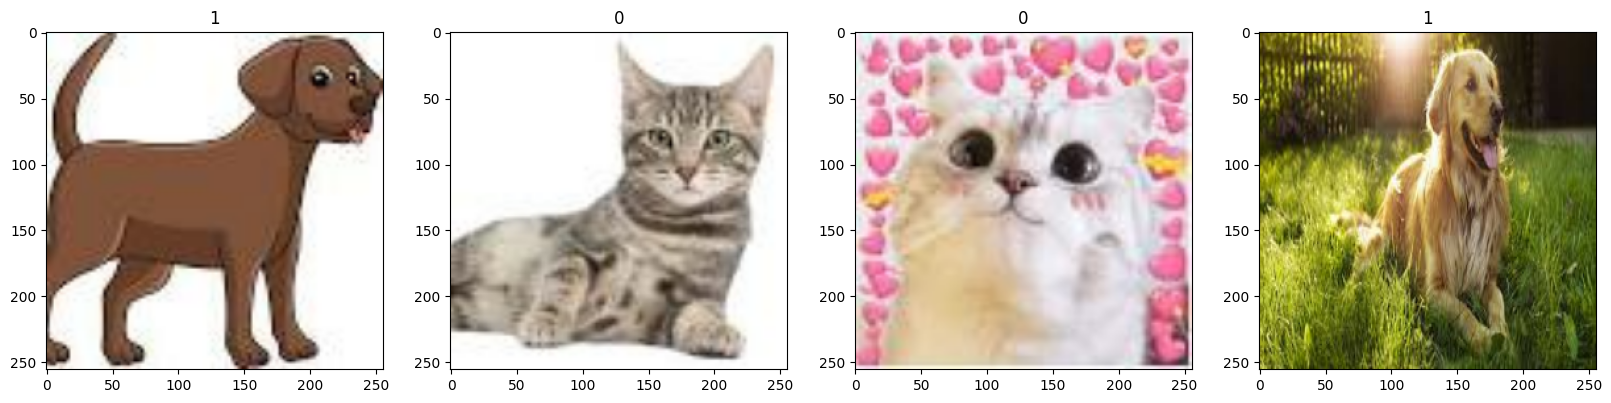

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#4. Scale Data


In [ ]:
data = data.map(lambda x,y:(x/255,y))


8

#5. Split Data


In [ ]:
train_size=int(len(data)*.7)
val_size= int(len(data)*.2+1)
test_size=int(len(data)*.1+1)
train_size,val_size,test_size

(5, 2, 1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

#6. Build Deep Learning Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [ ]:
model = Sequential ([

    Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3),1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3),1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [ ]:
model.compile(optimizer = 'adam', loss = ['binary_crossentropy'] , metrics=['binary_accuracy'])

#7. Train

In [ ]:
log_dir = 'logs2'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
hist = model.fit(train, epochs=20,validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 5s 433ms/step - loss: 1.4645 - binary_accuracy: 0.5000 - val_loss: 0.7680 - val_binary_accuracy: 0.4219
Epoch 2/20
5/5 [==============================] - 4s 605ms/step - loss: 0.6884 - binary_accuracy: 0.5437 - val_loss: 0.6828 - val_binary_accuracy: 0.6250
Epoch 3/20
5/5 [==============================] - 3s 404ms/step - loss: 0.7075 - binary_accuracy: 0.6438 - val_loss: 0.6269 - val_binary_accuracy: 0.6250
Epoch 4/20
5/5 [==============================] - 3s 389ms/step - loss: 0.7316 - binary_accuracy: 0.6438 - val_loss: 0.6556 - val_binary_accuracy: 0.5781
Epoch 5/20
5/5 [==============================] - 3s 409ms/step - loss: 0.6396 - binary_accuracy: 0.5875 - val_loss: 0.6051 - val_binary_accuracy: 0.5938
Epoch 6/20
5/5 [==============================] - 5s 695ms/step - loss: 0.5985 - binary_accuracy: 0.6625 - val_loss: 0.5767 - val_binary_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 3s 401ms/step - loss: 0.54

#8. Plot Performance


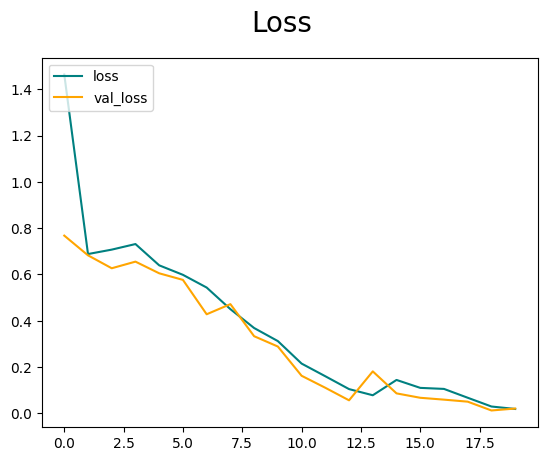

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#9. Test


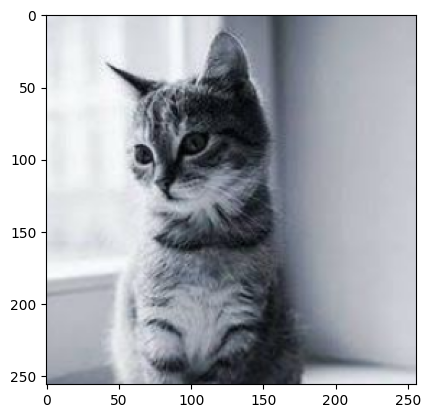

In [31]:
img= cv2.imread('test.jpg')
cat = tf.image.resize(img, (256,256))
plt.imshow(cat.numpy().astype(int))
plt.show()


In [22]:
yhat1 = model.predict(np.expand_dims(cat/255, 0))

1/1 [==============================] - 0s 18ms/step


In [28]:
def evaluate(value):
  if value[0][0]<.5:
    print('Cat')
  else:
    print('Dog')

In [29]:
evaluate(yhat1)

Cat


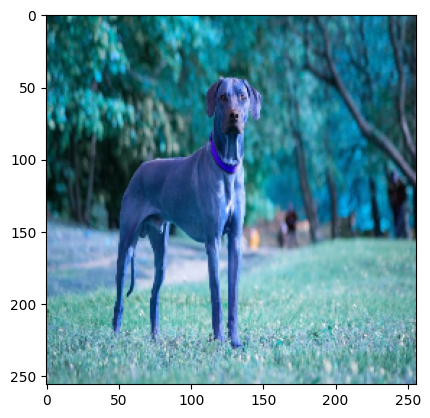

In [32]:
img= cv2.imread('test2.jpg')
dog = tf.image.resize(img, (256,256))
plt.imshow(dog.numpy().astype(int))
plt.show()

In [26]:
yhat2 = model.predict(np.expand_dims(dog/255, 0))


1/1 [==============================] - 0s 18ms/step


In [30]:
evaluate(yhat2)

Dog


#10. Save the Model

In [4]:
from tensorflow.keras.models import load_model


In [5]:
model.save(os.path.join('models','imageclassifier.h5'))


In [6]:

new_model = load_model('models/imageclassifier.h5')


In [33]:
new_model.predict(np.expand_dims(cat/255, 0))

1/1 [==============================] - 0s 37ms/step


array([[0.03033641]], dtype=float32)